In [1]:
import drawSvg as draw, numpy as np
from svg.path import parse_path

## archive

In [ ]:
from xml.dom import minidom

p = r'/Users/raphaellaude/github/random_map/graphic_assets/hwy.svg'

doc = minidom.parse(p)  # parseString also exists
path_strings = [path.getAttribute('d') for path
                in doc.getElementsByTagName('path')]
doc.unlink()

## constants

In [2]:
s1 = 'M11.32,2.86H.86a3.6,3.6,0,0,1,.25,1.37C.86,6.22-.08,6.76,0,8.36c.18,3.57,4,3.71,6.32,5.18h0c2.26-1.56,6.06-1.84,6.1-5.41,0-1.6-.94-2.11-1.27-4.09A2.82,2.82,0,0,1,11.32,2.86Z'
s2 = 'M11.85,1.46,10.27.27A3.61,3.61,0,0,1,6.06,0a3.61,3.61,0,0,1-4.2.43L.33,1.68A9.82,9.82,0,0,1,.86,2.86H11.32A9.49,9.49,0,0,1,11.85,1.46Z'
s3 = 'M15.78,10.68H26.24A3.22,3.22,0,0,1,26,9.31c.25-2,1.18-2.53,1.1-4.13-.18-3.56-4-3.7-6.32-5.18h0c-2.26,1.57-6.07,1.85-6.1,5.42,0,1.6.94,2.1,1.27,4.08A3,3,0,0,1,15.78,10.68Z'
s4 = 'M15.25,12.08l1.57,1.19a3.63,3.63,0,0,1,4.22.27,3.63,3.63,0,0,1,4.2-.43l1.53-1.24a9.55,9.55,0,0,1-.53-1.19H15.78A9,9,0,0,1,15.25,12.08Z'

## helpers

In [3]:
def rand_spanning_line(w, h, up=True):
    if up:
        rand_width = np.random.randint(w)
        return up, [rand_width, 0, rand_width, h]
    else:
        rand_height = np.random.randint(h)
        return up, [0, rand_height, w, rand_height]
    
def get_path_from_d(d, x_inc=0, y_inc=0, s=1, **kwargs):
    p = draw.Path(**kwargs)
    
    splits = [x for x in enumerate(d) if x[1] in 'ACLMQSTVZ']
    
    for x in range(1, len(splits)):
        i1, v1 = splits[x - 1]
        i2, v2 = splits[x]
        
        add_to_path(p, d, i1, v1, i2, x_inc, y_inc, s)
        
        if v2 == 'Z': p.Z()
            
    return p
            
def add_to_path(p, d, i1, v1, i2, x_inc, y_inc, s):
    pts = [v.split(',') for v in d[i1 + 2 : i2 - 1].split(' ')]
    pts = [float(pt) for sl in pts for pt in sl]
    if v1 == 'M':
        assert len(pts) == 2
        x, y = pts
        p.M(x * s + x_inc, y * s + y_inc)
    if v1 == 'C':
        assert len(pts) == 6
        cx1, cy1, cx2, cy2, ex, ey = pts
        p.C(cx1 * s + x_inc, cy1 * s + y_inc, cx2 * s + x_inc, cy2 * s + y_inc, ex * s + x_inc, ey * s + y_inc)
    elif v1 in 'ML':
        assert len(pts) == 2
        x, y = pts
        p.L(x * s + x_inc, y * s + y_inc)
    elif v1 == 'A':
        assert len(pts) == 7
        rx, ry, rot, largeArc, sweep, ex, ey = pts
        p.A(rx * s, ry * s, rot, largeArc, not sweep, ex * s + x_inc, ey * s + y_inc)
    else:
        print(v1)

In [4]:
def draw_hwy(d, hwy_number, x, y, s):
    y_correct = 2.5
    x_inc = -20.9 * s + x
    y_inc = -3.5 * s + y - y_correct * s
    
    d.append(get_path_from_d(parse_path(s3).d(), x_inc=x_inc, y_inc=y_inc, s=s, fill='#20abe3'))
    d.append(get_path_from_d(parse_path(s4).d(), x_inc=x_inc, y_inc=y_inc, s=s, fill='#e42f2b'))

    d.append(draw.Text(hwy_number, font_family='Arial', text_anchor='middle', x=x, y=y - y_correct * s, fontSize=6.5 * s, fill='white'))

## visual

In [5]:
w, h = 500, 150

d = draw.Drawing(w, h, displayInline=False)

# Background
d.append(draw.Rectangle(0, 0, w, h, fill='#e8e8e8'))

# Side Roads
up, l = rand_spanning_line(w, h, up=np.random.randint(2))
d.append(draw.Lines(l[0], l[1], *l[2:], close=False, stroke='#ffffff', stroke_width=3, fill='none'))

# Highway Line
up, l = rand_spanning_line(w, h, up=not up)
d.append(draw.Lines(l[0], l[1], *l[2:], close=False, stroke='#f37d47', stroke_width=6, fill='none'))
d.append(draw.Lines(l[0], l[1], *l[2:], close=False, stroke='#ffd854', stroke_width=3, fill='none'))

# Highway Symbol
if up: lx, ly = l[0], h/2
else: lx, ly = w/2, l[1]

draw_hwy(d, str(np.random.randint(1, 495)), lx, ly, 2)

d

## terrain

In [6]:
from scipy.ndimage.interpolation import zoom

In [7]:
arr = np.random.uniform(size=(4,4))

arr

array([[0.0923814 , 0.50598737, 0.41899819, 0.2770113 ],
       [0.21591988, 0.62353318, 0.55179383, 0.55087074],
       [0.84433478, 0.70329346, 0.4444488 , 0.32368821],
       [0.91932881, 0.18622088, 0.09075937, 0.25287155]])

In [8]:
import matplotlib.pyplot as plt

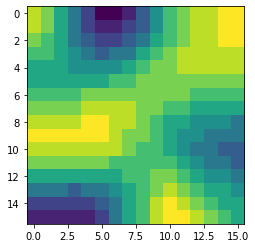

In [124]:
plt.imshow(zoom(np.random.uniform(size=(4, 4)), 4).round(1))

## slime mold

In [88]:
from matplotlib import cm
cmap = cm.get_cmap('tab20b')

In [10]:
rook = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

rook

array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]])

In [91]:
np.array([-1, 0]) * -1

array([1, 0])

In [101]:
rook

array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]])

In [100]:
rook[-1, 0]

0

In [97]:
rook[0, 1]

1

In [451]:
def get_next_square(ant, trails, inc=0.25, p_strength=0.25):
    dir_rook = np.copy(rook)
    x_behind, y_behind = ant['direction'] * -1 + 1
    dir_rook[x_behind, y_behind] = 0
    
    bleh = np.random.uniform(size=(3, 3)) * dir_rook
    
    x, y = ant['location']
    
    # Add bias for pheromones
    phero = np.pad(trails, 1)[x:x+3, y:y+3]
    phero /= phero.sum()
    phero += p_strength
    
    assert bleh.shape == phero.shape, f'{x, y}, {bleh.shape}, {phero} {phero.shape}, {phero.sum()}'
    bleh *= phero
    
    # Add bias for initial direction
    x_inc, y_inc = ant['direction'] + 1
    bleh[x_inc, y_inc] += inc
    
    # Find next direction
    edges = np.pad(np.ones(trails.shape), 1)[x:x+3, y:y+3]
    bleh *= edges
    
    direction = np.array(np.unravel_index(bleh.argmax(), bleh.shape)) - 1
    
    # Set ant on course
    ant['direction'] = direction
    ant['location'] += direction
    
    l = ant['location']
    assert ant['location'][0] >= 0 and ant['location'][1] >= 0, f'{l} {bleh} {edges} {phero}'
    
    return ant

### test

In [41]:
def clean_imshow():
    plt.box(None)
    
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])

In [13]:
possible_directions = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])

In [249]:
density

array([[753571, 753571, 753571, ..., 185193, 195112, 216000],
       [753571, 753571, 753571, ..., 185193, 195112, 216000],
       [753571, 753571, 753571, ..., 185193, 195112, 216000],
       ...,
       [205379, 205379, 205379, ..., 132651, 140608, 140608],
       [226981, 226981, 226981, ..., 132651, 140608, 140608],
       [250047, 250047, 238328, ..., 140608, 140608, 148877]])

In [259]:
np.where(trails > 0, trails - 1, 0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

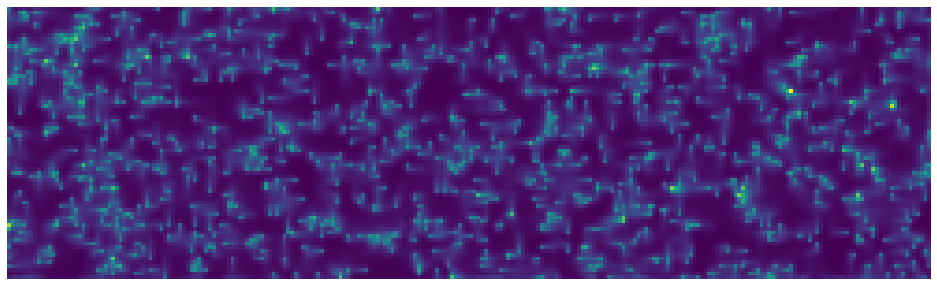

In [465]:
# setup
n, m = 75, 250
s = 35
n_ants = 1000
forward_bias = 2
p_strength = 5
diffusion = 0.8
g_sigma = 0.5

trails = np.zeros((n, m))

steps = []
steps.append(trails)

ants = [
    {'location':np.array([np.random.randint(n), np.random.randint(m)]),
     'direction':possible_directions[np.random.randint(4)]} for x in range(n_ants)]

for ant in ants:
    x, y = ant['location']
    trails[x, y] += 1
    
steps.append(trails)
    
# run
for x in range(25):
    for ant in ants:
        get_next_square(ant, trails, inc=forward_bias, p_strength=p_strength)

        x, y = ant['location']
        trails[x, y] += 1
#     trails -= 1
    trails = np.where(trails > 0, trails - trails * (1 - diffusion), 0)
    trails = gaussian_filter(trails, sigma=g_sigma)
    steps.append(trails[1:-1, 1:-1])

# visualize
plt.imshow(trails[1:-1, 1:-1])
clean_imshow()
fig = plt.gcf()
fig.set_size_inches(18, 5)

plt.show();

### try skimage for extraction

In [212]:
import skimage

In [215]:
import skimage.io
import skimage.feature
import sys

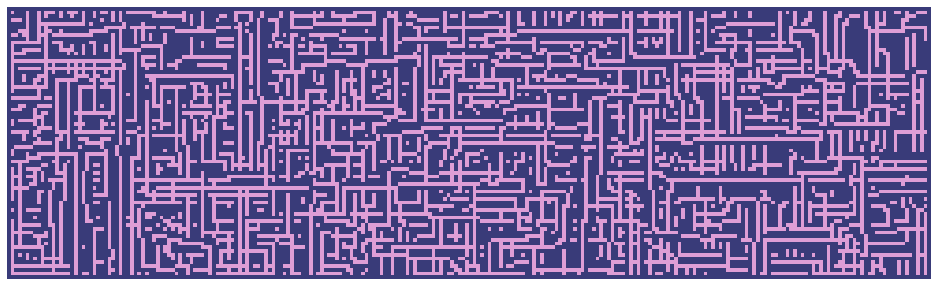

In [248]:
import skimage

im = trails[1:-1, 1:-1]

edges = skimage.feature.canny(image=im, sigma=1)

plt.imshow(edges * 1, cmap=cmap)
clean_imshow()
fig = plt.gcf()
fig.set_size_inches(18, 5)

plt.show();


### next steps

- Add idea of terrain
- Add idea of population density for ant initialization

## turning this into a map

- Categorize non zero line segments by length
- Assign to road type and draw lines on svg
- Apply road labels to major roads, one label for each major line segment (label in center of line segment, avoiding collisions?)
- Add terrain as base

In [172]:
def get_weighted_random_xy(shape, density):
    n, m = shape
    
    x = np.random.choice(n, p=density.mean(axis=1) / density.mean(axis=1).sum())
    y = np.random.choice(m, p=density[x, :] / density[x, :].sum())

    return np.array([x, y])

In [173]:
get_weighted_random_xy((75, 250), density)

array([  1, 178])

In [250]:
density = (zoom(np.random.uniform(size=(int(np.ceil(n / s)), int(np.ceil(m / s)))), s)[:n, :m])

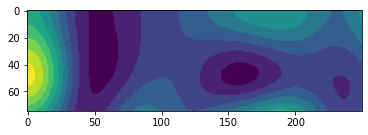

In [255]:
plt.imshow(density.round(1))

## animate

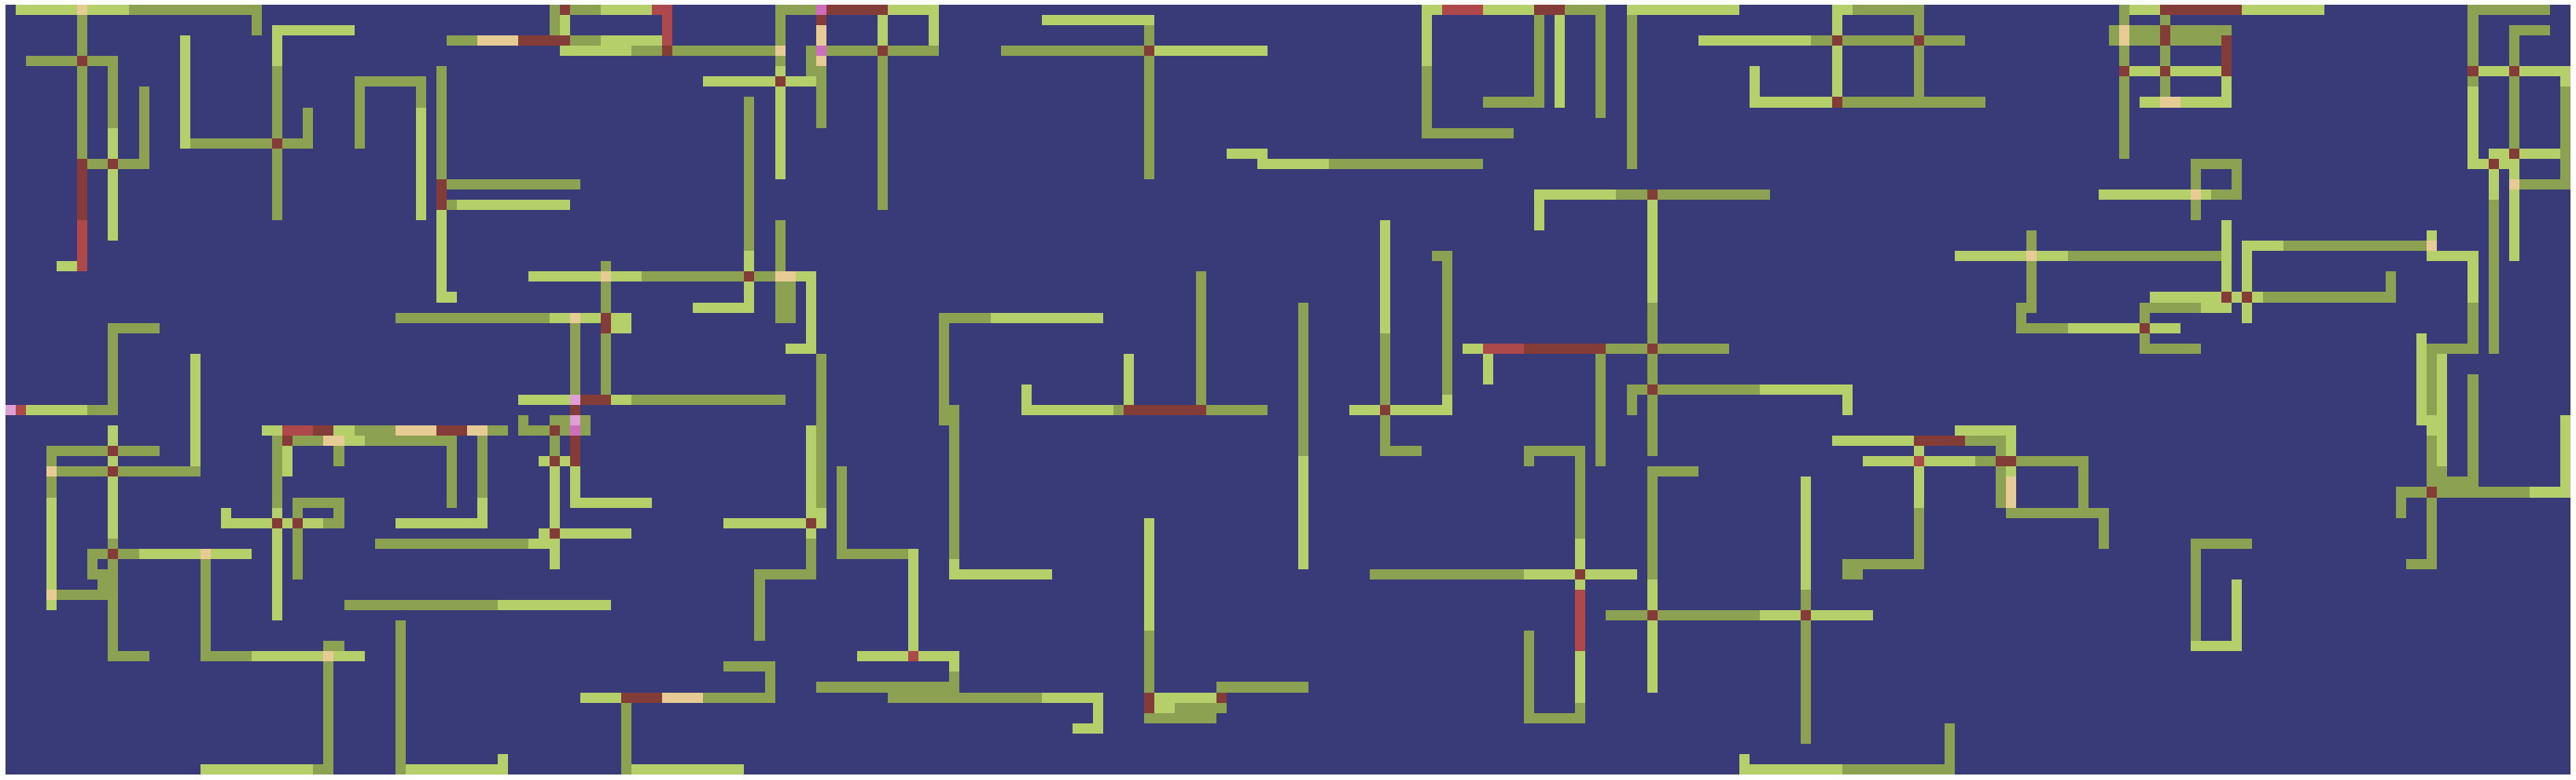

In [294]:
draw(trails);

In [427]:
def draw(img, max_side_len=18):
    n, m = img.shape
    plt.axis([0, m, 0, n])
    options = dict(cmap='viridis')
    options['extent'] = [0, m, 0, n]

    # plot
    im = plt.imshow(img, **options)

    # viz settings
    ax = plt.gca()
    fig = plt.gcf()

    if n >= m:
        xl = max_side_len; yl = max_side_len * (m / n)
    else:
        xl = max_side_len * (m / n); yl = max_side_len
    fig.set_size_inches(18, 5)
    
    plt.box(None)
    plt.grid()
    ax.set_xticks([])
    ax.set_yticks([])

    return im

In [428]:
def init_func():
    """Called at the beginning of an animation."""
    pass

def animate_func(img):
    """Draws one frame of the animation."""
    image.set_array(img)
    return (image,)

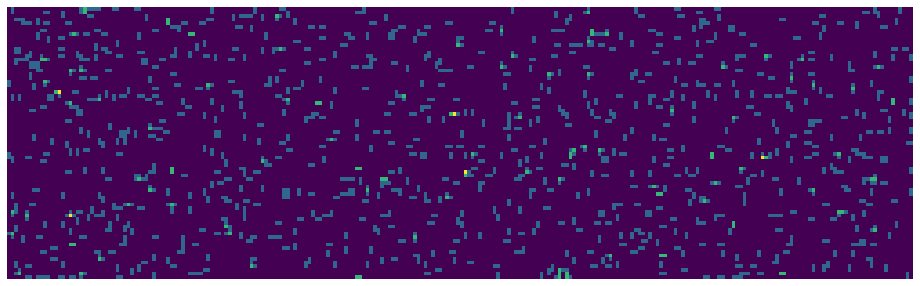

In [467]:
anim

In [332]:
from scipy.ndimage.filters import gaussian_filter

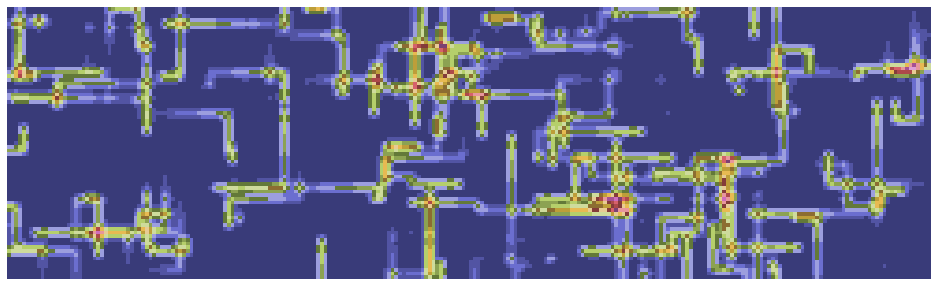

In [340]:
blurred = gaussian_filter(trails[1:-1, 1:-1], sigma=1)

draw(blurred)

In [2]:
import numpy as np

In [5]:
queen = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])

In [6]:
xxx = np.random.uniform(size=(3, 3)) * queen

In [7]:
xxx

array([[0.25074524, 0.1719293 , 0.4813277 ],
       [0.68428423, 0.        , 0.37739624],
       [0.13899746, 0.59718272, 0.13815213]])

In [10]:
np.pad(xxx, 1).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.17, 0.48, 0.  ],
       [0.  , 0.68, 0.  , 0.38, 0.  ],
       [0.  , 0.14, 0.6 , 0.14, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])